In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

sns.set()

In [26]:
df = pd.read_csv('real_estate_data.csv')
df.head()

market_price  sq_meters  age_years  bias
0           630      160.5         35     1
1           651      248.9         45     1
2           699      155.3         20     1
3           768      240.4         32     1
4           739      188.4         25     1

#### bias - required for the regression plane for the 3D scatter plot

In [27]:
df.shape

(23, 4)

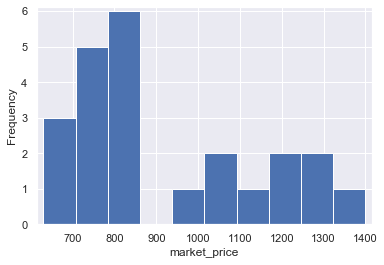

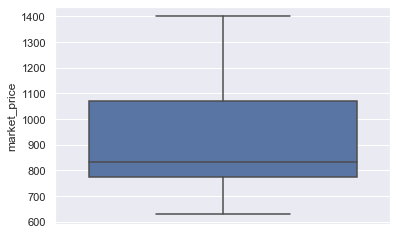

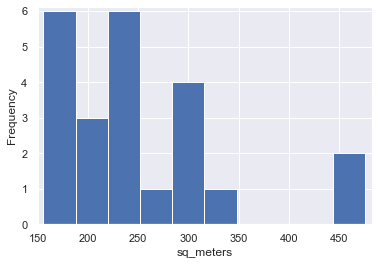

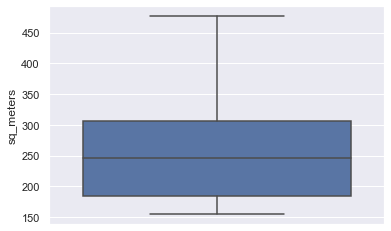

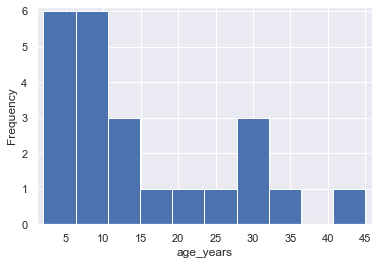

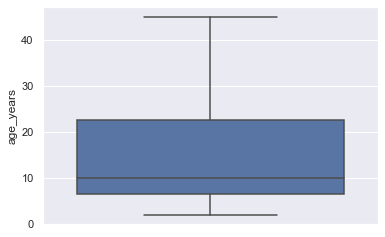

In [28]:
continuous_columns = ('market_price', 'sq_meters', 'age_years')

for col in continuous_columns:
    _ = plt.hist(df[col])
    _ = plt.xlabel(col)
    _ = plt.ylabel('Frequency')
    _ = plt.margins(0.02)
    plt.show()
    _ = sns.boxplot(df[col], orient='v')
    _ = plt.ylabel(col)
    plt.show()

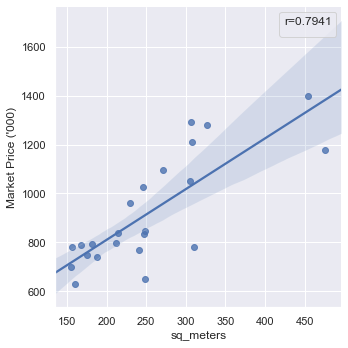

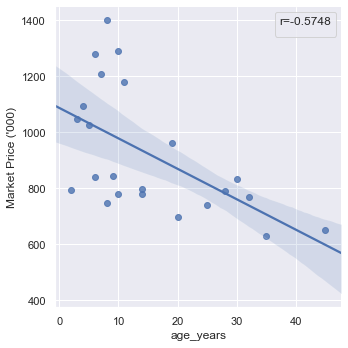

In [29]:
# plot selected corr's
plot_for_columns = ('sq_meters', 'age_years')

for col in plot_for_columns:
    _ = sns.lmplot(x=col, y='market_price', data=df)
    _ = plt.ylabel("Market Price (\'000)")
    _ = plt.xlabel(col)
    _ = plt.legend(labels=(), title='r={}'.format(round(df.market_price.corr(df[col]), 4)))
plt.show()

In [30]:
xx, yy, zz = np.meshgrid(df.sq_meters, df.age_years, df.bias)
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
X = df[['sq_meters', 'age_years', 'bias']]
y = df.market_price
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
Z = combinedArrays.dot(a)

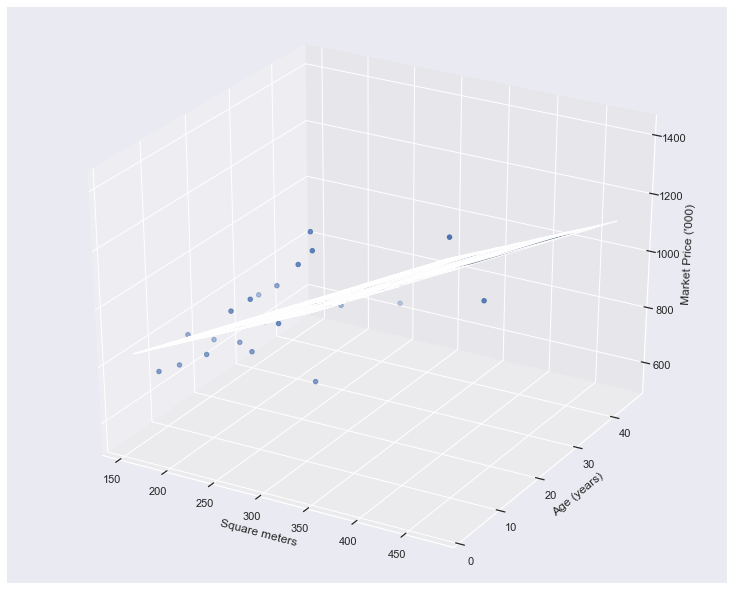

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(df.sq_meters, df.age_years, df.market_price)
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('Square meters')
ax.set_ylabel('Age (years)')
ax.set_zlabel("Market Price (\'000)")
plt.show()

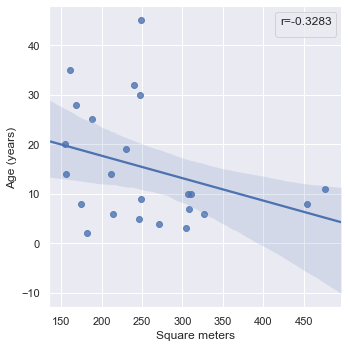

In [32]:
# Investigate multicollinearity
_ = sns.lmplot(x='sq_meters', y='age_years', data=df)
_ = plt.ylabel('Age (years)')
_ = plt.xlabel('Square meters')
_ = plt.legend(labels=(), title='r={}'.format(round(df.age_years.corr(df.sq_meters), 4)))
plt.show()

In [33]:
# Use only sq_meters
X = df.sq_meters
X = sm.add_constant(X)
y = df.market_price

model = sm.OLS(y, X).fit()
model.summary()

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           6.09e-06
Time:                        17:03:54   Log-Likelihood:                -145.15
No. Observations:                  23   AIC:                             294.3
Df Residuals:                      21   BIC:                             296.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        395.2900     92.504      4.273      0.000     202.918     587.662
sq_meters      2.0737      0.346      5.986      0.000       1.353       2.794
==============================================================================
Omnibus:                        0.201   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.255
Skew:                          -0.188   Prob(JB):                        0.880
Kurtosis:                       2.645   Cond. No.                         850.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### r_2 for sq_meters = 0.613

In [34]:
# Use only age_years
X = df.age_years
X = sm.add_constant(X)
y = df.market_price

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     10.36
Date:                Sat, 11 Jan 2020   Prob (F-statistic):            0.00412
Time:                        17:03:54   Log-Likelihood:                -151.99
No. Observations:                  23   AIC:                             308.0
Df Residuals:                      21   BIC:                             310.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1087.0400     64.749     16.788      0.000     952.386    1221.694
age_years    -10.8801      3.380     -3.219      0.004     -17.909      -3.851
==============================================================================
Omnibus:                        1.400   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.264
Skew:                           0.493   Prob(JB):                        0.532
Kurtosis:                       2.412   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### r_2 for age_years = 0.299

In [35]:
X = df[['sq_meters', 'age_years']]
X = sm.add_constant(X)
y = df.market_price

model = sm.OLS(y, X).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     28.63
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           1.35e-06
Time:                        17:03:54   Log-Likelihood:                -141.06
No. Observations:                  23   AIC:                             288.1
Df Residuals:                      20   BIC:                             291.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        573.5075    100.072      5.731      0.000     364.762     782.253
sq_meters      1.7718      0.315      5.633      0.000       1.116       2.428
age_years     -6.6635      2.280     -2.923      0.008     -11.419      -1.908
==============================================================================
Omnibus:                        0.944   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.171
Skew:                          -0.156   Prob(JB):                        0.918
Kurtosis:                       3.283   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The coefficient of the determinant (r-squared) is the proportion of variability of the dependent variable (y) accounted for, or explained by, the independent variable (x)

#### r_2 both = 0.715

In [37]:
# Do with sklearn
from sklearn import linear_model

X = df[['sq_meters', 'age_years']]
y = df.market_price
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [38]:
r_2 = lm.score(X,y)
r_2

0.7411017734970058

In [41]:
r_2_adjusted = 1 - (1 - r_2) * ((df.shape[0] - 1) / (df.shape[0] - X.shape[1] - 1))
r_2_adjusted

0.7152119508467063

In [15]:
lm.coef_

array([ 1.77180362, -6.66347946])

In [16]:
lm.intercept_

573.5074585558223

### Residual analysis

In [18]:
df['predicted'] = lm.predict(X)
df['residual'] = df.apply(lambda se: se.market_price - se.predicted, axis=1)
df.head()

market_price  sq_meters  age_years  bias   predicted   residual
0           630      160.5         35     1  624.660159   5.339841
1           651      248.9         45     1  714.652805 -63.652805
2           699      155.3         20     1  715.398972 -16.398972
3           768      240.4         32     1  786.217707 -18.217707
4           739      188.4         25     1  740.728275  -1.728275

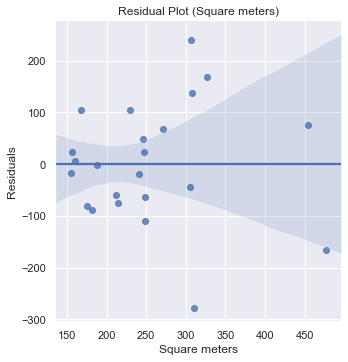

In [20]:
_ = sns.lmplot(x='sq_meters', y='residual', data=df)
_ = plt.ylabel('Residuals')
_ = plt.xlabel('Square meters')
_ = plt.title('Residual Plot (Square meters)')
plt.show()

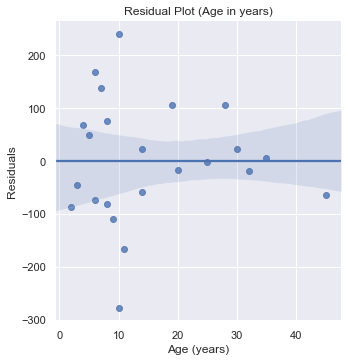

In [23]:
_ = sns.lmplot(x='age_years', y='residual', data=df)
_ = plt.ylabel('Residuals')
_ = plt.xlabel('Age (years)')
_ = plt.title('Residual Plot (Age in years)')
plt.show()

### Quadratic model (add square of age as a variable)

In [53]:
df['age_years_squared'] = df.apply(lambda se: se.age_years ** 2, axis=1)
df.head()

market_price  sq_meters  age_years  bias  age_years_transformed  \
0           630      160.5         35     1               1.544068   
1           651      248.9         45     1               1.653213   
2           699      155.3         20     1               1.301030   
3           768      240.4         32     1               1.505150   
4           739      188.4         25     1               1.397940   

   age_years_squared  
0             1225.0  
1             2025.0  
2              400.0  
3             1024.0  
4              625.0

In [57]:
X = df[['sq_meters', 'age_years', 'age_years_squared']]
X = sm.add_constant(X)
y = df.market_price
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     18.42
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           7.54e-06
Time:                        17:37:59   Log-Likelihood:                -140.93
No. Observations:                  23   AIC:                             289.9
Df Residuals:                      19   BIC:                             294.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               542.7414    121.046      4.484      0.000     289.390     796.093
sq_meters             1.7917      0.324      5.537      0.000       1.114       2.469
age_years            -2.7609      8.575     -0.322      0.751     -20.708      15.186
age_years_squared    -0.0922      0.195     -0.473      0.642      -0.500       0.316
==============================================================================
Omnibus:                        1.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                0.428
Skew:                          -0.239   Prob(JB):                        0.807
Kurtosis:                       3.466   Cond. No.                     3.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

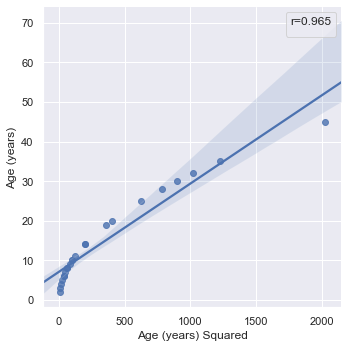

In [55]:
# Investigate multicollinearity
_ = sns.lmplot(x='age_years_squared', y='age_years', data=df)
_ = plt.ylabel('Age (years)')
_ = plt.xlabel('Age (years) Squared')
_ = plt.legend(labels=(), title='r={}'.format(round(df.age_years.corr(df.age_years_squared), 4)))
plt.show()

### Transform Age

In [58]:
import math

df['age_years_transformed'] = df.apply(lambda se: math.log(se.age_years), axis=1)
# df['age_years_transformed'] = df.apply(lambda se: -1 / math.sqrt(se.age_years), axis=1)
# df['age_years_transformed'] = df.apply(lambda se: -1 / se.age_years, axis=1)
df.head()

market_price  sq_meters  age_years  bias  age_years_transformed  \
0           630      160.5         35     1               3.555348   
1           651      248.9         45     1               3.806662   
2           699      155.3         20     1               2.995732   
3           768      240.4         32     1               3.465736   
4           739      188.4         25     1               3.218876   

   age_years_squared  
0             1225.0  
1             2025.0  
2              400.0  
3             1024.0  
4              625.0

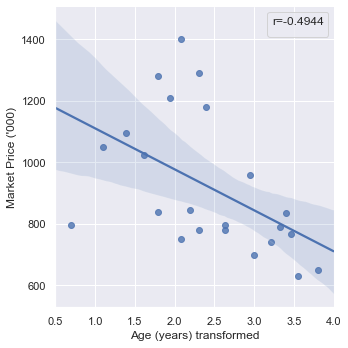

In [59]:
_ = sns.lmplot(x='age_years_transformed', y='market_price', data=df)
_ = plt.ylabel("Market Price (\'000)")
_ = plt.xlabel('Age (years) transformed')
_ = plt.legend(labels=(), title='r={}'.format(round(df.market_price.corr(df.age_years_transformed), 4)))
plt.show()